## Problem Summary:

With million of apps around nowadays, mobile app analytics is a great way to understand the existing strategy to drive growth and retention of future user. This data set contains more than 7000 Apple iOS mobile application details, e.g. size, price, genre, rating_count, description and etc. The data was extracted from the iTunes Search API at the Apple Inc website. The goal is to predict whether the overall rating for the app is more than 4 stars (1=yes, 0=no), which we think it a very good app

## Modeling

To start, let's first import all the necessary modules and libraries and read the data set into the Pandas dataframe. 

In [1]:
import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()
path = '/Users/oluwafemibabatunde/Desktop/Springboard/capstone_one/apple-app/data'
os.chdir(path)

Step2_output2.csv was used to split the dataframe into train and test  dataframes

In [3]:
X_train = pd.read_csv('X_train.csv', index_col = 0)
X_test = pd.read_csv('X_test.csv', index_col = 0)
y_train = pd.read_csv('y_train.csv', index_col = 0)
y_test = pd.read_csv('y_test.csv', index_col = 0)
df = pd.read_csv('step2_output2.csv', index_col=0)

Confirm the shape of the dataframe 

In [4]:
X_train.shape, y_train.shape

((3453, 4916), (3453, 1))

In [5]:
X_test.shape, y_test.shape

((1152, 4916), (1152, 1))

In [6]:
df.columns

Index(['id', 'size_bytes', 'price', 'rating_count_tot', 'rating_count_ver',
       'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num',
       'lang.num',
       ...
       '请联系我们', '購読', '贴心', '通勤', '遊んだことがあるかもしれないような無料ゲームや売り切りアプリが盛りだくさん',
       '酒店', '重要', '随时随地', '音乐', '音量調整'],
      dtype='object', length=4896)

In [7]:
X = df.drop(['rating'], axis =1)

Import modules needed for analysis and 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Feature Scaling:
#I did this scaling to make all feature be on the same magnitude.
scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)            

# Applying Machine Learning Model

#### This is a classification problem, in supervised learning. Here we have used the following classification models:
* Logistic Regression
* K-Nearest Neighbor (KNN)
* Support vector machine (SVM)
* Random Forest
* Naive Bayes
* Gradient Boost

Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set as done above. But the performance of the prediction result depends upon the random choice of the pair of (train,validation) set. Inorder to overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.

#### Classification/ Confusion Matrix: 
This matrix summarizes the correct and incorrect classifications that a classifier produced for a certain dataset. Rows and columns of the classification matrix correspond to the true and predicted classes respectively. The two diagonal cells (upper left & lower right (TP & TN respectively)) give the number of correct classifications, where the predicted class coincides with the actual class of the observation. The off diagonal cells gives the count of the misclassification (upper right & lower left (FP & FN respectively)). The classification matrix gives estimates of the true classification and misclassification rates.

## Logistic Regression

In [10]:
C_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    Logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
    Logreg.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = Logreg.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table

,C_parameter,Accuracy
0,0.001,0.574653
1,0.010,0.599826
2,0.100,0.599826
3,1.000,0.594618
4,10.000,0.584201
5,100.000,0.585069


In [11]:
from sklearn.model_selection import GridSearchCV
clfl2=LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(X_train, y_train)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.cv_results_

(LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 {'C': 0.1},
 0.6521865044888503,
 {'mean_fit_time': array([ 1.70291076,  2.26290617,  4.03374639,  5.7164444 ,  9.30153885,
         13.57218089]),
  'std_fit_time': array([0.06047772, 0.18792989, 0.12198932, 0.41369453, 1.40913168,
         1.60194587]),
  'mean_score_time': array([0.00475588, 0.00459127, 0.00377145, 0.00406137, 0.00368075,
         0.00387955]),
  'std_score_time': array([8.39827130e-04, 1.30390806e-03, 3.39983891e-05, 4.01760607e-04,
         1.51818646e-04, 1.22979714e-04]),
  'param_C': masked_array(data=[0.0001, 0.001, 0.1, 1, 10, 100],
               mask=[False, False, False, False, False, False],
         fill_value='?',
             

In [12]:
clfl2=LogisticRegression(C=fitmodel.best_params_['C'])
clfl2.fit(X_train, y_train)
ypred=clfl2.predict(X_test)
accuracy_score(ypred, y_test)

0.5998263888888888

In [13]:
from sklearn.metrics import confusion_matrix

cnf_matrix= confusion_matrix(y_test,y_pred_lr)
print(cnf_matrix)
Accuracy_lr=Logreg.score(X_test,y_test)

print(Accuracy_lr)

[[433 223]
 [255 241]]
0.5850694444444444


The confusion matrix shows that logistic regression model had alot of misclassifications and the accuracy score is very low.

In [14]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(Logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(Logreg,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.62386364 0.59210425 0.59256689 0.52895366 0.52471278]
Mean cross validation test score: 0.5724402421158146
Mean cross validation train score: 0.6447635511243784
Standard deviation in cv test scores: 0.03900029356420067


## K-Nearest Neighbor (KNN):

In [15]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import plot_roc_curve

# Apply KNN model to training data:

knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=50)
knn.fit(X_train,y_train)

# Predict using model:

y_predict_knn=knn.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_knn)
print(cnf_matrix)
Accuracy_knn=knn.score(X_test,y_test)

print(Accuracy_knn)

[[644  12]
 [473  23]]
0.5789930555555556


KNN model got more false negative. 

In [16]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(knn,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(knn,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_knn= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_knn))

[0.60969697 0.61878325 0.53442825 0.56473128 0.52378749]
Mean cross validation test score: 0.5702854499190376
Mean cross validation train score: 0.6376323061844957
Standard deviation in cv scores: 0.0384290310304475


## Support Vector Machine (SVM)

In [17]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
print(cnf_matrix)

Accuracy_svm=svm.score(X_test,y_test)
print(Accuracy_svm)

[[451 205]
 [266 230]]
0.5911458333333334


In [18]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

[0.61151515 0.57483229 0.58901997 0.52401881 0.52378749]
Mean cross validation test score: 0.5646347443904695
Mean cross validation train score: 0.6570653781728739
Standard deviation in cv scores: 0.03525493877100151


## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)

[[513 143]
 [203 293]]
0.6996527777777778


In [20]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.76310606 0.73945562 0.7258077  0.70942247 0.72075719]
Mean cross validation test score: 0.7317098080037011
Mean cross validation train score: 0.7980748278315405
Standard deviation in cv scores: 0.01842412879921656


## Naive Baise

In [21]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

#Predict using the model:

y_predict_nb=nb.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_nb)
print(cnf_matrix)
Accuracy_nb=nb.score(X_test,y_test)
print(Accuracy_nb)

[[287 369]
 [197 299]]
0.5086805555555556


The Naive Bayes model has the least TP classification. The model performed poorly.

In [22]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(nb,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(nb,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_nb_test= cv_scores_test.mean()
cv_scores_nb_train= cv_scores_train.mean()
cv_scores_std_nb= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_nb_test))
print ('Mean cross validation train score: ' +str(cv_scores_nb_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_nb))

[0.48439394 0.53315599 0.54865448 0.50319994 0.50038553]
Mean cross validation test score: 0.5139579767137019
Mean cross validation train score: 0.5768793077870031
Standard deviation in cv scores: 0.023436681029804843


## Gradient Boosting

In [23]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(X_test,y_test)
print(Accuracy_gbc)

[[508 148]
 [195 301]]
0.7022569444444444


The Gradient Boost and Random Forest produced the high TP classification and the precision score for both models are very close.

In [24]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.74977273 0.73081965 0.71871386 0.70429486 0.7591179 ]
Mean cross validation test score: 0.7325437967460868
Mean cross validation train score: 0.7951639717146268
Standard deviation in cv scores: 0.01997629282579511


## Model Comparisons

We applied different ML models above and evaluated their performances in terms of ROC-AUC score for both the training and test data. Here we have tabulated the scores and plotted them.

Clearly, the Gradient Boost, and the Random Forest are the two best performing models. Both of the models are ensembled, based on decision trees.
So, we will perform a grid search/ hyperparameter tuning for those two ML models.

In [25]:
myLabels = [ 'Logistic Regression','KNN','SVM','Random Forest','Gradient Boost', 'Naive Bayes']
score_test= [  cv_scores_lr_test,cv_scores_knn_test,cv_scores_svm_test,cv_scores_rf_test,cv_scores_gbc_test,cv_scores_nb_test]
score_train= [  cv_scores_lr_train,cv_scores_knn_train,cv_scores_svm_train,cv_scores_rf_train,cv_scores_gbc_train,cv_scores_nb_train]
Accuracy_score = [Accuracy_lr,Accuracy_knn,Accuracy_svm,Accuracy_rf,Accuracy_gbc,Accuracy_nb]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(myLabels, score_train, score_test)), 
               columns =['Algorithm', 'ROC-AUC train score', 'ROC-AUC test score' ]) 
print(score_tab_acc)

score_tab

             Algorithm  Model accuracy score
0  Logistic Regression              0.585069
1                  KNN              0.578993
2                  SVM              0.591146
3        Random Forest              0.699653
4       Gradient Boost              0.702257
5          Naive Bayes              0.508681


,Algorithm,ROC-AUC train score,ROC-AUC test score
0,Logistic Regression,0.644764,0.572440
1,KNN,0.637632,0.570285
2,SVM,0.657065,0.564635
3,Random Forest,0.798075,0.731710
4,Gradient Boost,0.795164,0.732544
5,Naive Bayes,0.576879,0.513958


From the table above, it can be seen that Random Forest and Gradient Boost have the best scores from the 6 models used for classification. The Naive Bayes model is the worst performed of the models. The performances based on their accuracies are depicted in the graphs below.

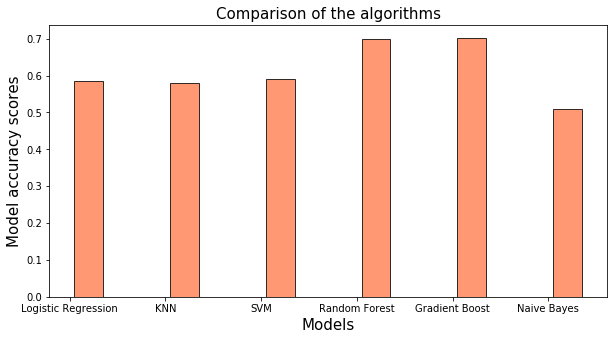

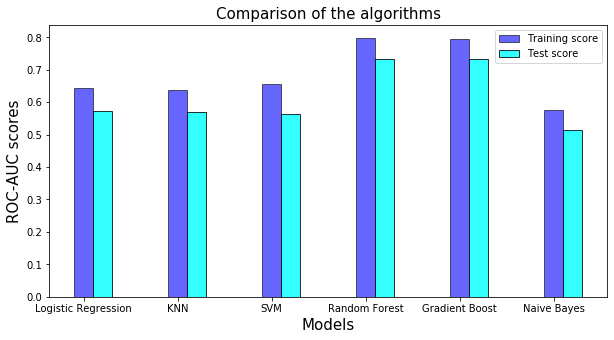

In [26]:
#plotting the accuracy scores:


index=[1,2,3,4,5,6]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.bar(index_acc,Accuracy_score,color='coral',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
plt.xticks([1, 2,3,4,5,6], myLabels)
#plt.legend()
plt.savefig("26.png")
plt.show()

#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3,4,5,6]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score_train,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,score_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5,6], myLabels)
plt.legend()
plt.savefig("27.png")
plt.show()

## Applying Grid Search CV To Hyperparameter Tuning 

In [27]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
0.7254561251086012


### Fitting RandomRorest with the optimal hyperparameters

In [28]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
rf.fit(X_train, y_train)
y_predictions_rf = rf.predict(X_test)
acc = accuracy_score(y_test, y_predictions_rf)
cv = cross_val_score(rf, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)

0.7100694444444444
0.7498182828847199


With the hyper-parameter tuning, the accuracy improved from 69.97% to 71.00%

In [29]:
#Final prediction RF:

target = pd.Series(y_predictions_rf, name='rating')
app_id = df['id']

output = pd.DataFrame(list(zip(app_id, target)), 
               columns =['app_id', 'rating']) 




output.to_csv('final_result_rf.csv', index=False, header=True)

In [30]:
#Feature importances:

features = X
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab.tail(20))

print(tab.head(10))


                                   Features  Importance scores
4875                                     腾讯           0.000725
4876                       自動更新される際の課金については           0.000731
4877                                自動更新の解除           0.000737
4878                                     英語           0.000739
4879                                     英超           0.000778
4880                                     西甲           0.000796
4881                                     视频           0.000831
4882                                     説明           0.000833
4883                                     订阅           0.000860
4884                                     设置           0.000863
4885                                  请联系我们           0.000890
4886                                     購読           0.000892
4887                                     贴心           0.000901
4888                                     通勤           0.000904
4889  遊んだことがあるかもしれないような無料ゲームや売り切りアプリが盛りだくさん           0

In [42]:
originalFeature = ['腾讯', 'x自動更新される際の課金については', '自動更新の解除', '英語', '英超', '西甲', '视频', '説明', '订阅', '设置', '请联系我们', '購読', '贴心', '通勤', '遊んだことがあるかもしれないような無料ゲームや売り切りアプリが盛りだくさん', '酒店', '重要', '随时随地', '音乐', '音量調整']
interpretation = ['Tencent', 'x About billing for automatic renewal', 'Cancel automatic update', 'English', "Premier League", 'La Liga', 'Video', 'Description','Subscription', ' Installation',' Demand-based self',' Subscription',' Commitment','Commuting',' Free of charge that you may have played Lots of games and sold-out apps','Hotel','Important','Anytime','Sound','Volume control']
dfFeatures = pd.DataFrame(list(zip(originalFeature, interpretation)), 
               columns =['Important Feature', 'Interpretion']) 
dfFeatures.tail(5)

,Important Feature,Interpretion
15,酒店,Hotel
16,重要,Important
17,随时随地,Anytime
18,音乐,Sound
19,音量調整,Volume control


Volume control is the most important feature in the model. It will be interesting to see if there is any correlation between these important features and the applications.

## ROC-AUC Score and the ROC curve:

In [31]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.7797286831235247


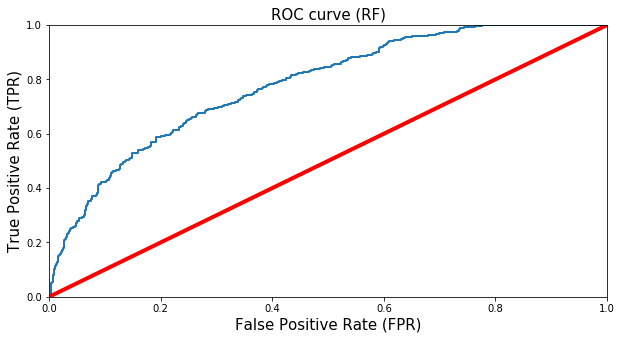

In [32]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("30.png")
plt.show()

## Parameter Tuning for Gradient Boost

In [33]:
GB = GradientBoostingClassifier()
gb_param = {
        'loss' : ["deviance"],
        'n_estimators' : [100,200,300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_features': [0.3, 0.1] 
        }

gsGB = GridSearchCV(GB, param_grid = gb_param, cv=3, scoring="accuracy", n_jobs= -1, verbose = 1)
gsGB.fit(X_train,y_train)
print(gsGB.best_estimator_)
print(gsGB.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 66.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 72.1min finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.7135823921227917


## Fitting the Gradient Boost model with the optimal hyperparameters:

In [34]:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
GB.fit(X_train, y_train)
y_predictions_GB = GB.predict(X_test)
acc_GB = accuracy_score(y_test, y_predictions_GB)
cv_GB = cross_val_score(GB, X_test, y_test,scoring='roc_auc').mean()
print(acc_GB)
print(cv_GB)

0.6996527777777778
0.7423318619291401


In [35]:
#Final prediction GB:

target = pd.Series(y_predictions_GB, name='rating')
app_id = df['id']

output = pd.DataFrame(list(zip(app_id, target)), 
               columns =['app_ID', 'rating']) 




output.to_csv('final_result_gb.csv', index=False, header=True)

In [36]:
features = X
importances = list(GB.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab.tail(20))

print(tab.head(10))

                                   Features  Importance scores
4875                                     腾讯           0.001670
4876                       自動更新される際の課金については           0.001676
4877                                自動更新の解除           0.001693
4878                                     英語           0.001694
4879                                     英超           0.001780
4880                                     西甲           0.001786
4881                                     视频           0.001841
4882                                     説明           0.001893
4883                                     订阅           0.002027
4884                                     设置           0.002079
4885                                  请联系我们           0.002080
4886                                     購読           0.002224
4887                                     贴心           0.002254
4888                                     通勤           0.002260
4889  遊んだことがあるかもしれないような無料ゲームや売り切りアプリが盛りだくさん           0

In [46]:
gbFeatures = ['腾讯', '自動更新される際の課金については', '自動更新の解除', '英語', '英超', '西甲', '视频', '説明', '订阅', '设置', '请联系我们', '購読', '贴心', '通勤', '遊んだことがあるかもしれないような無料ゲームや売り切りアプリが盛りだくさん', '酒店', '重要', '随时随地', '音乐', '音量調整']
gbinterp = ['Tencent','For billing when automatically renewed','Cancel automatic renewal','English', 'Premier League','La Liga','Video','Description','Subscribe','Settings','Please contact us','Purchase','Intimate','Commuter', 'A lot of free games and sold-out apps that you might have played', 'Hotel','Important','Anytime','Music','Volume control']
gbDFeatures = pd.DataFrame(list(zip(gbFeatures, gbinterp)), 
               columns =['Important Feature', 'Interpretion']) 
gbDFeatures.tail(5)

,Important Feature,Interpretion
15,酒店,Hotel
16,重要,Important
17,随时随地,Anytime
18,音乐,Music
19,音量調整,Volume control


Volume control is the most important feature in the gradient boost model. It will be interesting to see if there is any correlation between these important features and the applications.

## ROC-AUC Score and the ROC curve:

In [37]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_gb = GB.predict_proba(X_test)
y_scores_gb = y_scores_gb[:,1]
auroc = roc_auc_score(y_test, y_scores_gb)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.7656004130605821


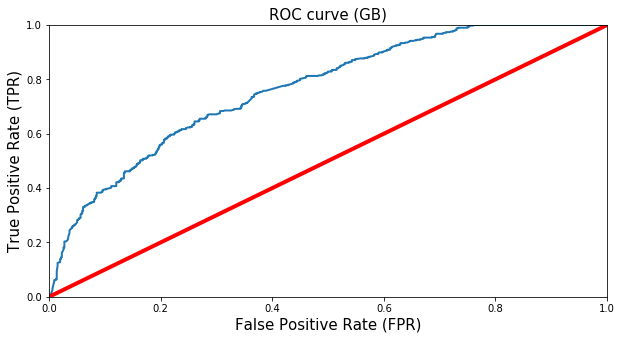

In [38]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_gb)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (GB)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("31.png")
plt.show()

## Conclusion:


In order to predict the app ratings, here we have considered different features, either directly from the dataset or engineered/derived from the data. Interestingly, the engineeered features are the most important ones in terms of relative importances.

This is a classification problem. Here we have used the following classification models:

* Logistic Regression
* K-Nearest Neighbor (KNN)
* Support vector machine (SVM)
* Random Forest
* Naive Bayes
* Gradient Boost

Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set. But the performance of the prediction result depends upon the random choice of the pair of (train,validation) set. Inorder to overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.

We have evaluated each models in terms of model accuracy score, and 'ROC-AUC' score for both the training and test data, and plotted them. The two best performing models are the Random forest and the Gradient boost. Both are the ensemble model, based on decision trees.
Next, we have carried out the grid search CV for the hyperparameter tuning for both the models seperately. This step was the most time consuming one in terms of computation. (The GB model took much longer time). With the result of the optimized hyperparameters, we have again fitted the two models, and got the predictions seperately.

We have evaluated the ROC-AUC scores with the optimized hyperparameters. Clearly, the model performance improved with the optimized parameters. The final ROC-AUC scores for both RF and the GB are 0.7797 and 0.7656
Based on these scores, after the ,hyperparameter tuning, the Random Forest model is the best performing model.
The final prediction tables (Two columns: app_ID and rating) are saved as csv files.